## 主成分分析（principal component analysis， PCA）

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

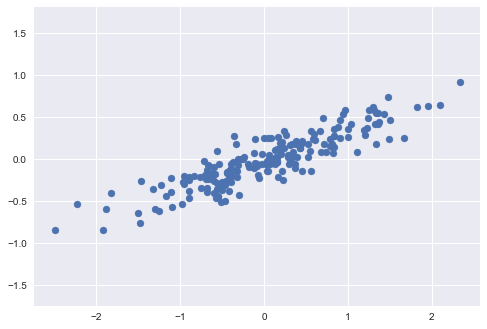

In [6]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

### 无监督学习希望探索 x 值和 y 值之间的相关性。

In [7]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [9]:
print(pca.explained_variance_)

[ 0.7625315  0.0184779]


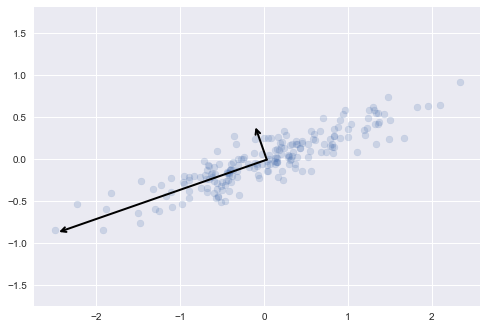

In [10]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',linewidth=2,shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
# 画出数据
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

## 用PCA降维

### 原理：去掉一个或者多个最小主成分，从而得到一个更低维度且保留最大数据方差的数据投影

In [11]:
pca=PCA(n_components=1)
pca.fit(X)
x_pca=pca.transform(X)
print("原数据：",X.shape)
print("转换后的数据：",x_pca.shape)

原数据： (200, 2)
转换后的数据： (200, 1)


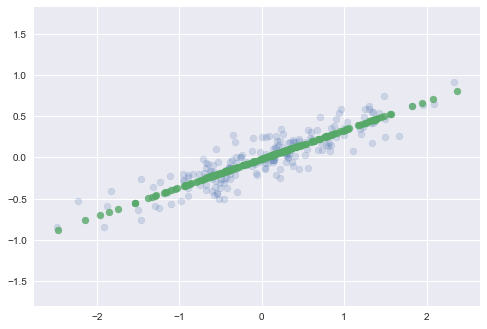

In [13]:
X_new=pca.inverse_transform(x_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');


### 用PCA做可视化：手写数字

In [14]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [16]:
#8 * 8的数字，相当于每个数字均为64维数据
#将其投影到一个可操作的维度
pca=PCA(2)  #2维的PCA模型
projected=pca.fit_transform(digits.data)

print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


C:\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


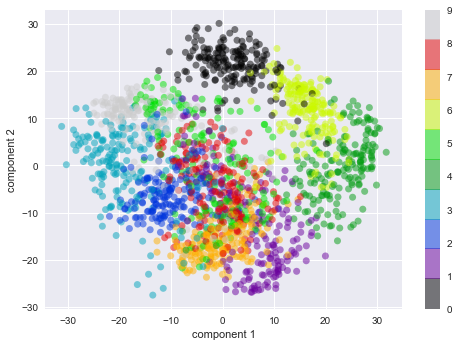

In [17]:
plt.scatter(projected[:, 0], projected[:, 1],c=digits.target, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### 如何选择成分的数量

>我们可以将**累计方差贡献率**看作是关于成分数量的函数，从而确定所需成分的数量

[ 0.14890594  0.28509365  0.40303959  0.48713938  0.54496353  0.59413263
  0.6372925   0.67390623  0.70743871  0.73822677  0.76195018  0.78467714
  0.80289578  0.82063433  0.83530534  0.84940249  0.86258838  0.87506976
  0.88524694  0.89430312  0.9031985   0.91116973  0.91884467  0.9260737
  0.93303259  0.9389934   0.94474955  0.94990113  0.95479652  0.9590854
  0.96282146  0.96635421  0.96972105  0.97300135  0.97608455  0.97902234
  0.98158823  0.98386565  0.98608843  0.98820273  0.99010182  0.99168835
  0.99319995  0.99460574  0.99577196  0.99684689  0.99781094  0.99858557
  0.99914278  0.99954711  0.99975703  0.99983951  0.99989203  0.99994255
  0.99997555  0.99998798  0.99999503  0.99999804  0.99999911  0.99999966
  1.          1.          1.          1.        ]


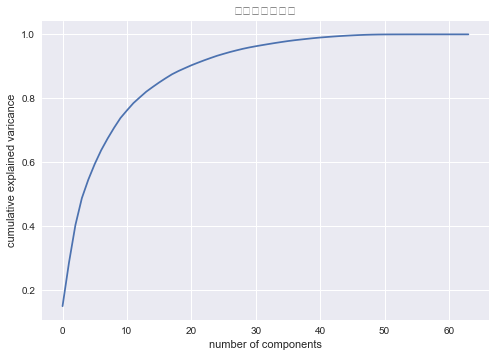

In [30]:
pca=PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained varicance')
plt.title('累计方差贡献率')

#Cumsum ：计算轴向元素累加和，返回由中间结果组成的数组
print(np.cumsum(pca.explained_variance_ratio_))

### 用PCA作噪音过滤

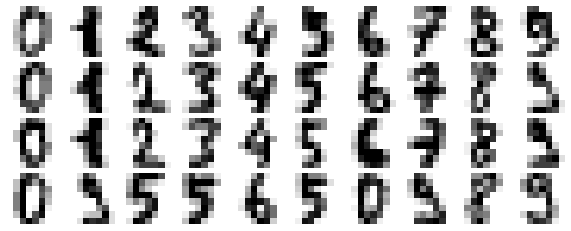

In [33]:
def plot_digits(data):
    fig,axes=plt.subplots(4,10,figsize=(10,4),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i,ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),cmap='binary',interpolation='nearest',clim=(0,16))
plot_digits(digits.data)

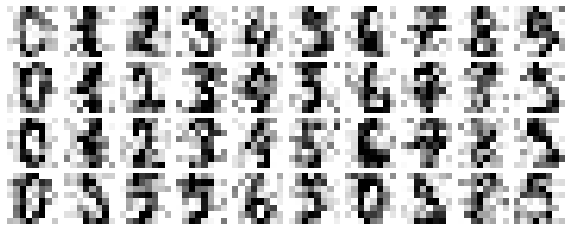

In [35]:
#添加一些随机噪声
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [37]:
#noisy为添加噪声之后的数据

#看下主成分分析
pca=PCA(0.50).fit(noisy)   #通过结果可以看出：这里 50% 的方差对应 12 个主成份
pca.n_components_

12

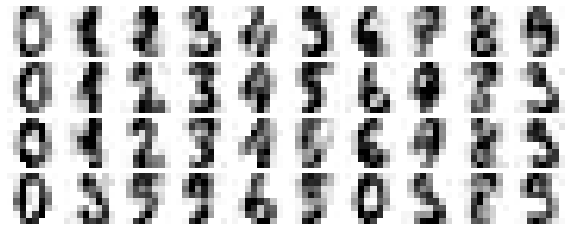

In [38]:
components=pca.transform(noisy)

filtered = pca.inverse_transform(components)
plot_digits(filtered)

## PCA做特征选择

In [39]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [40]:
from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA(150)
pca.fit(faces.data)

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:57: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


RandomizedPCA(copy=True, iterated_power=2, n_components=150,
       random_state=None, whiten=False)

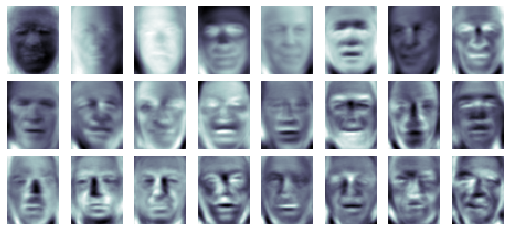

In [41]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

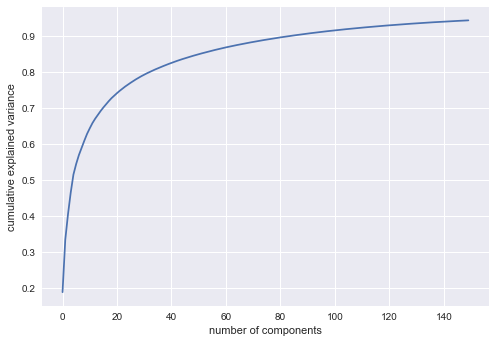

In [42]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:57: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


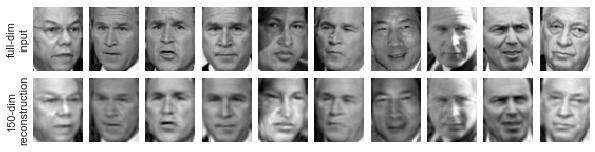

In [43]:
#可以看到，利用这150规模的特征，几乎可以恢复原来的脸
# 计算成分和投影的人脸
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

# 画出结果
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')  #显示原来的脸
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')   #显示降维后，重新恢复后的脸
    ax[0, 0].set_ylabel('full-dim\ninput') 
    ax[1, 0].set_ylabel('150-dim\nreconstruction');

### 总结：用主成分分析进行降维、高维数据的可视化、噪音过滤，以及高维数据的特征选择。